# Homework 5

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a) (30 points) Start by cleaning up the dataset to get it into a form where we can apply statistical
learning methods to predict our dependent variable of interest. Please briefly describe each
step that you took to clean and process the data. Here are some suggestions:

In [2]:
conda install beautifulsoup4

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup

In [4]:
test = pd.read_csv("stack_stats_2020_test.csv")
train = pd.read_csv("stack_stats_2020_train.csv")

In [5]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8249 entries, 0 to 8248
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      8249 non-null   int64 
 1   Score   8249 non-null   int64 
 2   Body    8249 non-null   object
 3   Title   8249 non-null   object
 4   Tags    8249 non-null   object
dtypes: int64(2), object(3)
memory usage: 322.4+ KB


,Id,Score,Body,Title,Tags
0,476132,0,<p><strong>Summarize the problem</strong></p>\...,What I do with the results extracted from lasso?,<stata><lasso>
1,450811,0,<p>I try to calculate the marginal likelihood ...,the marginal likelihood of analytical result i...,<sampling><marginal-distribution><rstan>
2,472876,1,<p>I have a data set which involves 30 binomia...,GLMER Overdispersion and Error messages,<lme4-nlme><glmm><eigenvalues><overdispersion>
3,470799,1,<p>It is well known that the K-means algorithm...,K-medoids: Is there any constraint about the c...,<clustering><k-medoids>
4,446472,2,<p>I'm working on a text classification proble...,Combining XGBoost and LightGBM,<python><boosting>


In [6]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19247 entries, 0 to 19246
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      19247 non-null  int64 
 1   Score   19247 non-null  int64 
 2   Body    19247 non-null  object
 3   Title   19247 non-null  object
 4   Tags    19247 non-null  object
dtypes: int64(2), object(3)
memory usage: 752.0+ KB


,Id,Score,Body,Title,Tags
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...


In [7]:
# drop NaN values as they obstruct LDA model since it doesn't let SVD converge
test = test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]
train = train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

ii ) When converting html texts that include multiple lines of texts to plain texts using get_text() from BeautifulSoup, the output texts still contain one type of html string, \n or the linebreak character. In other words, get_text() does not remove the linebreak characters. You will need to remove them using a proper method of your choice.

In [8]:
train_body = train['Body'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
train_title = train['Title'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

In [9]:
test_body = test['Body'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
test_title = test['Title'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

In [10]:
train_body

0        I have a set of data that I am transforming us...
1        We are sending a one bit message to someone.  ...
2        I am aware that there is a similar post: Vecto...
3        I have a Poisson distributed glm where I have ...
4        1) how do i decide which transformation or sca...
                               ...                        
19242    I'm currently trying to implement a decision t...
19243    What are the available tools (results) that ca...
19244    Let $X^n=(X_1,X_2,...,X_n)$ denote a sample wh...
19245    I have a data set of property sales where info...
19246    I have data from a human subject experiment wi...
Name: Body, Length: 19247, dtype: object

In [11]:
test_body

0       Summarize the problem\nI have a dataset with p...
1       I try to calculate the marginal likelihood of ...
2       I have a data set which involves 30 binomial a...
3       It is well known that the K-means algorithm is...
4       I'm working on a text classification problem a...
                              ...                        
8244    My data is of the form $(x,y)\in\mathbb{R}^{20...
8245    I noticed the term ANOVA used in many contexts...
8246    I'm trying to do logistic regression, but I ca...
8247    Consider the following experimental design wit...
8248    I am constructing different configurations of ...
Name: Body, Length: 8249, dtype: object

In [12]:
train_body = train_body.apply(lambda x: x.replace("\n", " "))
train_title = train_title.apply(lambda x: x.replace("\n", " "))

In [13]:
test_body = test_body.apply(lambda x: x.replace("\n", " "))
test_title = test_title.apply(lambda x: x.replace("\n", " "))

In [14]:
train_body[0]

'I have a set of data that I am transforming using the clr function library(compositions) clr(my_data)  Now I used lmer to build mixed effect linear models and I am extracting the estimated means and the contrasts using emmeans. I am aware of the options that can be used to back-transform the data e.g.   model.rg <- update(ref_grid(model), tran =  "asin.sqrt")   emm1<-emmeans(model.rg, specs = ~ drug:age:time, type = "response")  However, I cannot figure out how to back-transform the data CLR transformed. Any idea how could I achieve the back-transformation within emmeans? Thank you '

In [15]:
test_body[0]

'Summarize the problem I have a dataset with panel data and I am trying to make variable selection. I have tried lasso technique. Lasso proposed me a list of variables that could be included in the model. What I do not understand is how should I use them. For example in stata I run the following : lasso lpsa lcavol lweight age lbph svi lcp gleason pgg45 lassocoef  Lasso lists for me a number of variables lcavol lweight svi What would I expect When I try to run a regression using the model lpsa~lcavol +lweight+svi to receive results demonstrating that lcavol, lweight and svi are significant predictors of lpsa. regress lpsa lcavol lweight svi   Can you help me understand what tests should I do with the variables selected by lasso in order to ensure that the model is suitable? '

iii ) You should also inspect several texts from Body, Tags and Title to see if there is any
other transformation needed. You may need to write a custom transformation function.

In [16]:
train_tags = train["Tags"]
test_tags = test["Tags"]

In [17]:
# lowercase train
train_body = train_body.str.lower()
train_title = train_title.str.lower()
train_tags = train_tags.str.lower()
# lowercase test
test_body = test_body.str.lower()
test_title = test_title.str.lower()
test_tags = test_tags.str.lower()

In [18]:
from string import punctuation

def no_punc(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct

In [19]:
train_body = train_body.apply(no_punc)
train_title = train_title.apply(no_punc)
train_tags = train_tags.apply(no_punc)

test_body = test_body.apply(no_punc)
test_title = test_title.apply(no_punc)
test_tags = test_tags.apply(no_punc)

In [20]:
train_body

0        i have a set of data that i am transforming us...
1        we are sending a one bit message to someone  t...
2        i am aware that there is a similar post vector...
3        i have a poisson distributed glm where i have ...
4        1 how do i decide which transformation or scal...
                               ...                        
19242    im currently trying to implement a decision tr...
19243    what are the available tools results that can ...
19244    let xnx1x2xn denote a sample where  1 ximathbf...
19245    i have a data set of property sales where info...
19246    i have data from a human subject experiment wi...
Name: Body, Length: 19247, dtype: object

In [21]:
train_title

0            r emmeans back tranform clr data using clrinv
1        trying to determine the failure rate of redund...
2        how to derive categorical cross entropy update...
3        learning more about glm parameters how to dig ...
4        is there i guide to decide which transformatio...
                               ...                        
19242    how does decision tree classify tuple whose co...
19243    what are the available tools results that can ...
19244       maximum likelihood estimator for censored data
19245    can you use a single missingness indicator for...
19246    what is the appropriate nonparametric test for...
Name: Title, Length: 19247, dtype: object

iv ) Once you have all texts in plain texts, you can use the Python library nltk to do text
cleaning and generate document term matrices as we did in Lab.

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wonshilraypark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
from nltk.tokenize import word_tokenize

train_body = train_body.apply(word_tokenize)
train_title = train_title.apply(word_tokenize)
train_tags = train_tags.apply(word_tokenize)

test_body = test_body.apply(word_tokenize)
test_title = test_title.apply(word_tokenize)
test_tags = test_tags.apply(word_tokenize)

In [24]:
test_body.head()

0    [summarize, the, problem, i, have, a, dataset,...
1    [i, try, to, calculate, the, marginal, likelih...
2    [i, have, a, data, set, which, involves, 30, b...
3    [it, is, well, known, that, the, kmeans, algor...
4    [im, working, on, a, text, classification, pro...
Name: Body, dtype: object

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wonshilraypark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [26]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words

In [27]:
train_body = train_body.apply(remove_stopwords)
train_title = train_title.apply(remove_stopwords)
train_tags = train_tags.apply(remove_stopwords)

test_body = test_body.apply(remove_stopwords)
test_title = test_title.apply(remove_stopwords)
test_tags = test_tags.apply(remove_stopwords)

In [28]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

In [29]:
train_body = train_body.apply(stemmer)
train_title = train_title.apply(stemmer)
train_tags = train_tags.apply(stemmer)

test_body = test_body.apply(stemmer)
test_title = test_title.apply(stemmer)
test_tags = test_tags.apply(stemmer)

In [30]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

train_body = train_body.apply(TreebankWordDetokenizer().detokenize)
train_title = train_title.apply(TreebankWordDetokenizer().detokenize)
train_tags = train_tags.apply(TreebankWordDetokenizer().detokenize)

test_body = test_body.apply(TreebankWordDetokenizer().detokenize)
test_title = test_title.apply(TreebankWordDetokenizer().detokenize)
test_tags = test_tags.apply(TreebankWordDetokenizer().detokenize)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# shorten length of countvect so add_suffix runs without any problems.
countvec = CountVectorizer(min_df = 0.005)
# instead of splitting the data, I used 3 countvec instead for each pair in test & train set
train_body = countvec.fit_transform(train_body)

In [32]:
train_body = pd.DataFrame(train_body.toarray(), columns=countvec.get_feature_names(), index=train.index)
train_body

,00,000,0001,001,005,01,02,03,04,05,...,y1,y2,ye,year,yet,yi,yield,yt,ytrain,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19244,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [33]:
frequencies = train_body.sum().sort_values(ascending=False)
print(frequencies[frequencies > 50])

model      22107
use        20995
data       18930
variabl    13641
would      11586
           ...  
mainli       106
wrote        105
unclear      104
besid        103
beginn       102
Length: 1485, dtype: int64


/Users/wonshilraypark/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


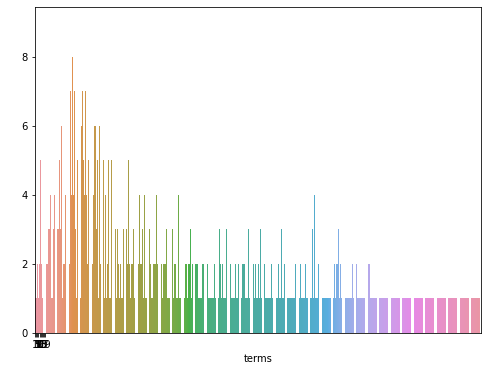

In [34]:
import seaborn as sns

plt.figure(figsize=(8,6))

ax = sns.countplot(frequencies)
plt.xticks(np.arange(1, 20, step=2), np.arange(1, 20, step=2))

# freq = pd.DataFrame(frequencies, columns=['Frequencies']).transpose()
# ax = sns.countplot(freq)
# ax = sns.distplot(frequencies, bins=len(frequencies))
# ax = plt.hist(frequencies[frequencies > 50])

plt.xlabel('terms')
plt.ylabel(' ')
plt.show()

In [35]:
countvec1 = CountVectorizer(min_df = 0.005)
train_title = countvec1.fit_transform(train_title)

train_title = pd.DataFrame(train_title.toarray(), columns=countvec1.get_feature_names(), index=train.index)
train_title.sum().sort_values(ascending=False)

model        2943
regress      2081
use          1875
variabl      1763
data         1758
             ... 
deal          101
similar       101
better         98
implement      98
creat          98
Length: 226, dtype: int64

In [36]:
countvec2 = CountVectorizer()
train_tags = countvec2.fit_transform(train_tags)

train_tags = pd.DataFrame(train_tags.toarray(), columns=countvec2.get_feature_names(), index=train.index)
train_tags.sum().sort_values(ascending=False)

regress                                                            79
probabl                                                            73
hypothesistest                                                     55
machinelearn                                                       55
machinelearningneuralnetwork                                       43
                                                                   ..
machinelearningneuralnetworkspythondatatransformationtensorflow     1
machinelearningneuralnetworkspythonkera                             1
machinelearningneuralnetworkspythonkerasconfusionmatrix             1
machinelearningneuralnetworkspythonlargedataadam                    1
ztestsubset                                                         1
Length: 16090, dtype: int64

In [37]:
test_body = countvec.transform(test_body)
test_body = pd.DataFrame(test_body.toarray(), columns=countvec.get_feature_names(), index=test.index)
test_body.sum().sort_values(ascending=False)

model        8940
use          8755
data         8027
variabl      5699
would        4918
             ... 
surpris        36
concret        36
motiv          35
fundament      35
meet           32
Length: 1485, dtype: int64

In [38]:
test_title = countvec1.transform(test_title)
test_title = pd.DataFrame(test_title.toarray(), columns=countvec1.get_feature_names(), index=test.index)
test_title.sum().sort_values(ascending=False)

model      1198
regress     866
use         838
data        791
variabl     791
           ... 
better       36
variat       33
run          33
lasso        32
would        28
Length: 226, dtype: int64

In [39]:
test_tags = countvec2.transform(test_tags)
test_tags = pd.DataFrame(test_tags.toarray(), columns=countvec2.get_feature_names(), index=test.index)
test_tags.sum().sort_values(ascending=False)

regress                                                            35
probabl                                                            34
neuralnetwork                                                      21
machinelearningneuralnetwork                                       20
hypothesistest                                                     19
                                                                   ..
machinelearningneuralnetworkspythoncrossvalidationscikitlearn       0
machinelearningneuralnetworkspythondatatransformationtensorflow     0
machinelearningneuralnetworkspythonkera                             0
machinelearningneuralnetworkspythonkerasconfusionmatrix             0
ztestsubset                                                         0
Length: 16090, dtype: int64

v ) Notice that there are words that appear in more than one column. For instance, a
question might have the term ‘regression’ in its title, body and tags. However, the terms
‘regression’ that appear at the three positions of this post may give different implications
about this post. (For example, using ‘regression’ in the title may signal something
different than ‘regression’ as a tag.) For this reason, the three types of text data that we
are dealing with should be processed independently, and you should use different column
names (e.g., regression_title, regression_body, regression_tags).

In [40]:
train_body = train_body.add_suffix('_body')
train_title = train_title.add_suffix('_title')
train_tags = train_tags.add_suffix('_tags')

In [41]:
test_body = test_body.add_suffix('_body')
test_title = test_title.add_suffix('_title')
test_tags = test_tags.add_suffix('_tags')

In part a:
1) Basic text cleaning
2) Change to lower case --> easier analysis
3) Remove Punctuation
4) Remove all digits
5) Tokenize in order to do certain word-related manipulations
6) Remove Stopwords
7) Stemming
8) Detokenized then created Document-Term Matrix (DTM)

b) (40 points) Use your analytics skills to build the best model that you can for predicting useful
questions. You are free to try whichever approaches you like, but you should try at least four
distinct methods that have been discussed in class (e.g., Logistic Regression, LDA, CART,
Random Forests, Boosting) and you should evaluate no more than a handful (i.e., 4-10) of
candidate models on the test set. For Random Forests and Boosting, it is OK to not cross
validate all of the parameters if it takes too much time on your computer – instead you may
use some reasonable values of these parameters and/or only cross validate some of them.
Report on the details of your training procedures and final comparisons on the test set. Use
your best judgment to choose a final model and explain your choice. Use the bootstrap to
asses the performance of your single chosen final model in a way that properly reports on the
variability of the relevant performance metrics (accuracy, TPR, and FPR).

In [42]:
train_concat = pd.concat([train_body, train_title, train_tags], axis = 1)
train_concat

,00_body,000_body,0001_body,001_body,005_body,01_body,02_body,03_body,04_body,05_body,...,wordembeddingsword2vecbagofwordsdoc2vec_tags,zeroinfl_tags,zeroinflationglmmtmb_tags,zeroinflationglmmtmbdispers_tags,zeroinflationpermutationtest_tags,zeroinflationprobit_tags,zipf_tags,zscore_tags,zscoredependentvari_tags,ztestsubset_tags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19244,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test_concat = pd.concat([test_body, test_title, test_tags], axis = 1)
test_concat

,00_body,000_body,0001_body,001_body,005_body,01_body,02_body,03_body,04_body,05_body,...,wordembeddingsword2vecbagofwordsdoc2vec_tags,zeroinfl_tags,zeroinflationglmmtmb_tags,zeroinflationglmmtmbdispers_tags,zeroinflationpermutationtest_tags,zeroinflationprobit_tags,zipf_tags,zscore_tags,zscoredependentvari_tags,ztestsubset_tags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train['Useful'] = (train['Score'] >= 1).astype('int32').astype('object')
train.head()

,Id,Score,Body,Title,Tags,Useful
0,495560,1,<p>I have a set of data that I am transforming...,R: emmeans back tranform clr data using clrInv,<r><mixed-model><linear><lsmeans>,1
1,489896,0,<p>We are sending a one bit message to someone...,Trying to determine the failure rate of redund...,<probability><python>,0
2,497951,2,<p>I am aware that there is a similar post: <a...,How to derive categorical cross entropy update...,<logistic><cross-entropy>,1
3,478542,2,<p>I have a Poisson distributed glm where I ha...,"Learning more about glm parameters, how to dig...",<generalized-linear-model><interpretation>,1
4,458388,0,<p>1) how do i decide which transformation or ...,Is there I guide to decide which transformatio...,<python><data-transformation><dataset><feature...,0


In [45]:
test['Useful'] = (test['Score'] >= 1).astype('int32').astype('object')
test.head()

,Id,Score,Body,Title,Tags,Useful
0,476132,0,<p><strong>Summarize the problem</strong></p>\...,What I do with the results extracted from lasso?,<stata><lasso>,0
1,450811,0,<p>I try to calculate the marginal likelihood ...,the marginal likelihood of analytical result i...,<sampling><marginal-distribution><rstan>,0
2,472876,1,<p>I have a data set which involves 30 binomia...,GLMER Overdispersion and Error messages,<lme4-nlme><glmm><eigenvalues><overdispersion>,1
3,470799,1,<p>It is well known that the K-means algorithm...,K-medoids: Is there any constraint about the c...,<clustering><k-medoids>,1
4,446472,2,<p>I'm working on a text classification proble...,Combining XGBoost and LightGBM,<python><boosting>,1


In [46]:
(train['Useful'] == 0).sum(axis=0), (train['Useful'] == 1).sum(axis=0)

(9684, 9563)

In [47]:
(test['Useful'] == 0).sum(axis=0), (test['Useful'] == 1).sum(axis=0)

(4226, 4023)

In [48]:
y_train = pd.DataFrame(train['Useful']).astype('int32').values.ravel()
y_test = pd.DataFrame(test['Useful']).astype('int32').values.ravel()
X_train = train_concat
X_test = test_concat
X_train.shape, X_test.shape

((19247, 17801), (8249, 17801))

Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

# error message to increase max_iter (default=100)
logreg = LogisticRegression(random_state=88, max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=88)

In [50]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5553400412171172


In [51]:
from sklearn.metrics import roc_curve, auc
y_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc

0.5753042226788959

Low accuracy could be due to the possibility of having: redundant features, improper splitting of tokens, and model selection most likely

CART/Decision Tree Classifier w/ CV

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=2).fit(X_train, y_train)

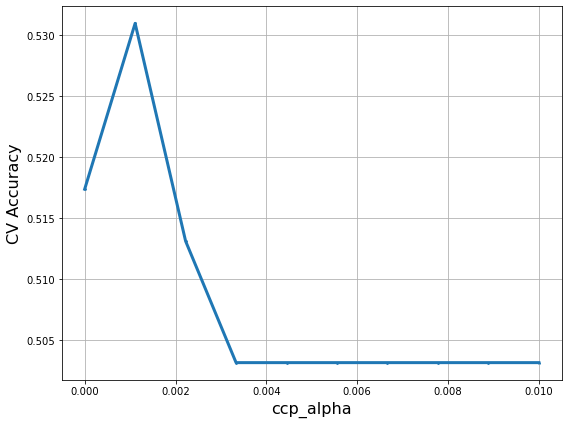

Best ccp_alpha {'ccp_alpha': 0.0011111111111111111}


In [57]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 3


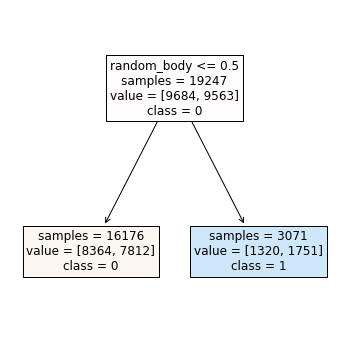

In [58]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[3697  529]
 [3287  736]]

Accuracy: 0.5373984725421264


Boosting

In [65]:
import time
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'n_estimators': np.linspace(1, 50, 5, dtype='int32'),  # np.logspace(6, 12, num=7, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': np.linspace(2, 10, 8, dtype='int32'),
               'max_depth': [10],
               'min_samples_leaf': [1],
               'random_state': [88]} 

tic = time.time()

gbc = GradientBoostingClassifier(n_estimators = 50, min_samples_leaf = 5, 
                                 random_state = 88, learning_rate = 0.01, max_leaf_nodes = 10)
#gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=2)
gbc.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 204.81 s


In [66]:
gbc.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 88,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [67]:
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[3191 1035]
 [2605 1418]]

Accuracy: 0.558734392047521


Random Forest 

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=100, random_state=88)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, random_state=88)

In [69]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[4154   72]
 [3924   99]]

Accuracy: 0.5155776457752455


In [70]:
import time

grid_values = {'max_features': np.linspace(1, 100, 5, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [100],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 5, 
                                 random_state = 88, max_features = 100) 
#rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5)
rf.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 28.05 s


In [71]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[2511 1715]
 [1835 2188]]

Accuracy: 0.5696448054309613


Random Forest: Accuracy: 0.5696448054309613 (n_estimators = 50);
Boosting: Accuracy: 0.558734392047521 (n_estimators = 50);
CART/Decision Tree Classifier w/ CV: Accuracy: 0.5373984725421264;
Logistic Regression: Accuracy: 0.5553400412171172.

Since Random Forest's accuracy is higher than the rest, we would use this model to measure usefulness.

In [72]:
def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

In [76]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [79]:
bs_output = bootstrap_validation(X_test,y_test,y_train,rf,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error])

(500, 3)


(-0.15, 0.15)

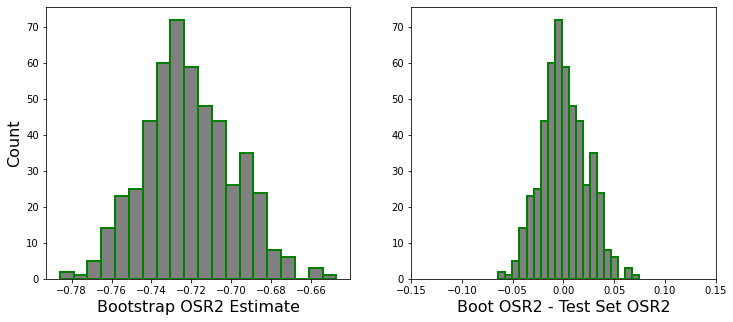

In [81]:
test_OSR2 = OS_R_squared(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].hist(bs_output.iloc[:,0]-test_OSR2, bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.15,0.15])

TPR & FPR

In [84]:
y_pred = rf.predict(X_test)
cm_baseline = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm_baseline)

Confusion Matrix: 
 [[2511 1715]
 [1835 2188]]


In [85]:
accuracy_baseline = (cm_baseline.ravel()[0]+cm_baseline.ravel()[3]) /sum(cm_baseline.ravel()) # (TP+TN)/(TP+FP+TN+FN)
TPR_baseline = cm_baseline.ravel()[3] / (cm_baseline.ravel()[3]+cm_baseline.ravel()[2]) # TP/(TP+FN)
FPR_baseline = cm_baseline.ravel()[1] / (cm_baseline.ravel()[1]+cm_baseline.ravel()[0]) # FP/(FP+TN)
print('Accuracy: ' + str(round(accuracy_baseline, 3)))
print('TPR: ' + str(round(TPR_baseline, 3))) # TPR should be 0 because never predict positive class
print('FPR: ' + str(round(FPR_baseline, 3))) # FPR should be 0 because never predict positive class

Accuracy: 0.57
TPR: 0.544
FPR: 0.406


TPR Using Bootstrap

In [87]:
def bootstrap_tpr(y_pred, y_test,y_train):
    cm_baseline = confusion_matrix(y_test, y_pred)
    TPR_baseline = cm_baseline.ravel()[3] / (cm_baseline.ravel()[3]+cm_baseline.ravel()[2]) # TP/(TP+FN)
    return TPR_baseline

In [149]:
def bootstrap_validation_tpr_fpr(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    #n_metrics = int(metrics_list(y_pred, y_test,y_train))
    #output_array= np.zeros([n_sample, n_metrics])
    #output_array[:]=np.nan
    #print(output_array.shape)
    output_array=[]
    
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label[bs_index]
        bs_predicted = model.predict(bs_data)
        bs_metrics = metrics_list(bs_predicted,bs_label,train_label)
        output_array.append(bs_metrics)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [150]:
bs_output_tpr = bootstrap_validation_tpr_fpr(X_test,y_test,y_train,rf,bootstrap_tpr)

In [151]:
bs_output_tpr.head()

,0
0,0.543301
1,0.543155
2,0.543363
3,0.554725
4,0.545522


FPR Using Bootstrap

In [152]:
def bootstrap_fpr(y_pred, y_test,y_train):
    cm_baseline = confusion_matrix(y_test, y_pred)
    FPR_baseline = cm_baseline.ravel()[1] / (cm_baseline.ravel()[1]+cm_baseline.ravel()[0]) # FP/(FP+TN)
    return FPR_baseline

In [153]:
bs_output_fpr = bootstrap_validation_tpr_fpr(X_test,y_test,y_train,rf,bootstrap_fpr)

In [154]:
bs_output_fpr.head()

,0
0,0.403951
1,0.408125
2,0.409535
3,0.410536
4,0.405616


I chose random forest for my final model due to it's accuracy being higher during the model tests and the accuracy baseline is 0.57, while the True Positive Rate is 0.544 and the False Positive Rate is 0.406.

c) (30 points) Now, let us consider how Stack Exchange might use your model. In particular,
consider the following scenario. When a user navigates to the Cross Validated page, they
are automatically presented with the 15 most recently submitted questions, in order of most
recent first (this is not necessarily true in reality, but let’s pretend that it is). Suppose that
Stack Exchange would like to keep these same 15 most recently submitted questions on this
page, but they would like to rearrange the order of the questions so as to show the most
useful questions at the top of the page. Suppose further that Stack Exchange believes that
most users are extremely impatient and will only pay attention to the single question at the
very top of the page, and therefore they would like to maximize the probability that the
top question is useful.

i ) Think about how to select a model, among many different models, to best accomplish
the goal of maximizing the probability that the top question is useful. Comment on
the precise criteria that you would use (e.g., “I would select a model with the highest
accuracy” or “I would select a model with the highest TPR”, etc.) and note that your
answer may involve multiple performance metrics if you wish. Explain your response.

I would select a model with the highest TPR with bootstrap, while also searching for the lowest FPR as a secondary search after finding the accuracy for each model. By modeling the queue and relevancy based on these 2 factors, we are able to recommend the most useful post given that we want more true positives and less false positives. 

To make it more complicated, we could also search for the accuracy, FPR & TPR of each model and isolate the models that have the highest accuracy and TPR, and lowest FPR. If in the chance this happens, we can bootstrap the models for further validation. 

ii ) Revisiting the models that you have built in part (b), can you identify a specific model
that best accomplishes the goal? (Note that this model may be different from the final
model you selected in part (b), and you are allowed to do some re-training in addition to
re-evaluating your models.) How much does the model you selected improve upon Stack
Exchange’s current approach of showing the most recent posts first (described above)?
In particular, use the results of your model on the test set to give a precise numerical
estimate of the increase in the probability that the top question is useful. If you like, you
may use a back-of-the-envelope “on average” style of analysis as part of your reasoning
to answer this question.

Based on what we did in the project, I think Random Forest best accomplishes the goal since we went through the cycle of finding the accuracy for each model before boostrapping it to find the average accuracy, FPR, and TPR.
The baseline accuracy is 0.57 on average for the Random Forest model, while the TPR is 0.544 and FPR is 0.406. While the accuracy and TPR are above the 0.5 standard threshold, and FPR is below, this is a good sign. Thus, the % of usefulness would be on average 57%.

Based on the more complicated method I would find the FPR & TPR & baseline accuracy of all the models and see which ones I have to isolate.

In [155]:
# we already did Random Forest, so let's find the other model's scores
# Logistic Regression
y_pred = logreg.predict(X_test)
cm_baseline = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm_baseline)

Confusion Matrix: 
 [[2481 1745]
 [1923 2100]]


In [156]:
accuracy_baseline = (cm_baseline.ravel()[0]+cm_baseline.ravel()[3]) /sum(cm_baseline.ravel()) # (TP+TN)/(TP+FP+TN+FN)
TPR_baseline = cm_baseline.ravel()[3] / (cm_baseline.ravel()[3]+cm_baseline.ravel()[2]) # TP/(TP+FN)
FPR_baseline = cm_baseline.ravel()[1] / (cm_baseline.ravel()[1]+cm_baseline.ravel()[0]) # FP/(FP+TN)
print('Accuracy: ' + str(round(accuracy_baseline, 3)))
print('TPR: ' + str(round(TPR_baseline, 3))) # TPR should be 0 because never predict positive class
print('FPR: ' + str(round(FPR_baseline, 3))) # FPR should be 0 because never predict positive class

Accuracy: 0.555
TPR: 0.522
FPR: 0.413


In [157]:
# CART
y_pred = dtc_cv.predict(X_test)
cm_baseline = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm_baseline)

Confusion Matrix: 
 [[3697  529]
 [3287  736]]


In [158]:
accuracy_baseline = (cm_baseline.ravel()[0]+cm_baseline.ravel()[3]) /sum(cm_baseline.ravel()) # (TP+TN)/(TP+FP+TN+FN)
TPR_baseline = cm_baseline.ravel()[3] / (cm_baseline.ravel()[3]+cm_baseline.ravel()[2]) # TP/(TP+FN)
FPR_baseline = cm_baseline.ravel()[1] / (cm_baseline.ravel()[1]+cm_baseline.ravel()[0]) # FP/(FP+TN)
print('Accuracy: ' + str(round(accuracy_baseline, 3)))
print('TPR: ' + str(round(TPR_baseline, 3))) # TPR should be 0 because never predict positive class
print('FPR: ' + str(round(FPR_baseline, 3))) # FPR should be 0 because never predict positive class

Accuracy: 0.537
TPR: 0.183
FPR: 0.125


In [161]:
# Boosting
y_pred = gbc.predict(X_test)
cm_baseline = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm_baseline)

Confusion Matrix: 
 [[3191 1035]
 [2605 1418]]


In [162]:
accuracy_baseline = (cm_baseline.ravel()[0]+cm_baseline.ravel()[3]) /sum(cm_baseline.ravel()) # (TP+TN)/(TP+FP+TN+FN)
TPR_baseline = cm_baseline.ravel()[3] / (cm_baseline.ravel()[3]+cm_baseline.ravel()[2]) # TP/(TP+FN)
FPR_baseline = cm_baseline.ravel()[1] / (cm_baseline.ravel()[1]+cm_baseline.ravel()[0]) # FP/(FP+TN)
print('Accuracy: ' + str(round(accuracy_baseline, 3)))
print('TPR: ' + str(round(TPR_baseline, 3))) # TPR should be 0 because never predict positive class
print('FPR: ' + str(round(FPR_baseline, 3))) # FPR should be 0 because never predict positive class

Accuracy: 0.559
TPR: 0.352
FPR: 0.245


Based on the results, it is clear to see that the Random Forest is the best option in terms of Accuracy and TPR, while the CART model rates the least for FPR. Due to FPR being a more secondary focus, I would stick with the Random Forest to determine relevancy/usefulness.  